# Phase II: Data Curation, Exploratory Analysis and Plotting (5\%)

### Team Members:
- Gokul Ramanan
- Fanny
- Gensen
- Haojin


## Part 1:
(1%) Expresses the central motivation of the project and explains the (at least) two key questions to be explored. Gives a summary of the data processing pipeline so a technical expert can easily follow along.

## Problem Motivation


## Summary of the Data Processing Pipeline


## Part 2:
(2\%) Obtains, cleans, and merges all data sources involved in the project.

In [1]:
!pip install wbdata

In [2]:
import wbdata as wb
import pandas as pd
import datetime as dt

In [4]:
def clean_data(countries, indicators, year_start, year_end):
  """
    Fetch and preprocess World Bank indicator data for specified countries and years.

    This function retrieves data from the World Bank API for the given indicators and countries,
    converts the date column to integer years, and filters the results to include only data within
    the specified year range.

    Parameters
    ----------
    countries : list of str
        A list of country codes (e.g., ["IN", "US", "CN"]) to retrieve data for.
    indicators : dict
        A dictionary mapping indicator names to World Bank indicator codes.
        Example: {"GDP per capita": "NY.GDP.PCAP.CD"}
    year_start : int
        The starting year of the desired time range.
    year_end : int
        The ending year of the desired time range.

    Returns
    -------
    pandas.DataFrame
        A cleaned DataFrame containing country, date (year), and indicator values
        filtered to the specified range, with a flat index for easier use.
  """

  data = wb.get_dataframe(indicators, country=countries).reset_index()
  data["date"] = data["date"].astype(int)
  data = data[(data["date"] <= year_end) & (data["date"] >= year_start)]

  return data


# List of the top 20 countries ranked by GDP in 2024
# (using ISO-3 country codes as defined by the World Bank API)

countries = ["US", "CN", "DE", "JP", "IN", "GB", "FR", "IT", "CA", "BR", "RU", "MX",
             "AU", "ES", "KR", "ID", "TR", "SA", "NL", "CH"]

# Dictionary of World Bank indicators for GDP growth prediction
# Key = World Bank indicator code
# Value = Custom short name
# Units commented next to each indicator

indicators = {
    # Demographics & Population
    "EN.POP.DNST": "population_density",       # people per sq. km of land area
    "SP.POP.TOTL": "total_population",         # number of people
    "SP.URB.TOTL.IN.ZS": "urban_population_pct", # % of total population living in urban areas
    "SP.DYN.TFRT.IN": "fertility_rate",        # births per woman
    "SP.POP.DPND": "age_dependency_ratio",     # % of working-age population (dependents per 100 working-age people)

    # Health & Capital
    "SP.DYN.LE00.IN": "life_expectancy",       # years
    "SP.DYN.IMRT.IN": "infant_mortality",      # per 1,000 live births
    "SH.XPD.CHEX.PC.CD": "health_exp_pc",      # US$ per capita (current)
    "SH.XPD.CHEX.GD.ZS": "health_exp_gdp_pct", # % of GDP

    # Education System
    "SE.ADT.LITR.ZS": "adult_literacy",        # % of people ages 15+
    "SE.PRM.ENRR": "primary_school_enroll",    # % gross enrollment ratio
    "SE.SEC.ENRR": "secondary_school_enroll",  # % gross enrollment ratio
    "SE.TER.ENRR": "tertiary_school_enroll",   # % gross enrollment ratio
    "SE.XPD.TOTL.GD.ZS": "edu_exp_gdp_pct",    # % of GDP spent on education

    # Economy & Market Growth
    "NY.GDP.PCAP.CD": "gdp_per_capita",        # current US$
    "NE.GDI.TOTL.ZS": "gross_capital_form_pct",# % of GDP (investment)
    "FP.CPI.TOTL.ZG": "inflation_rate",        # annual %, consumer prices
    "SL.UEM.TOTL.ZS": "unemployment_rate",     # % of total labor force
    "NE.TRD.GNFS.ZS": "trade_pct_gdp",         # % of GDP (exports + imports)
    "BX.KLT.DINV.WD.GD.ZS": "fdi_inflows_pct"  # % of GDP (net inflows of FDI)
}

# We want the dataset to include only years between 1980 and 2022
cleaned_data = clean_data(countries, indicators, 1980, 2022)

print(f"The data has {cleaned_data.shape[1]} features and {cleaned_data.shape[0]} observations.")

# Save the cleaned data into a csv for reuseability for ML practice
cleaned_data.to_csv("top20_gdp_indicators_1980_2022.csv", index=False)

The data has 22 features and 860 observations.


In [5]:
# Test
# Printing first 50 rows of the first cleaned CSV file
gdp_clean_data = pd.read_csv("top20_gdp_indicators_1980_2022.csv")
gdp_clean_data.head(20)

,country,date,population_density,total_population,urban_population_pct,fertility_rate,age_dependency_ratio,life_expectancy,infant_mortality,health_exp_pc,...,primary_school_enroll,secondary_school_enroll,tertiary_school_enroll,edu_exp_gdp_pct,gdp_per_capita,gross_capital_form_pct,inflation_rate,unemployment_rate,trade_pct_gdp,fdi_inflows_pct
0,Australia,2022,3.381998,26014399.0,86.488,1.630,54.584773,83.200000,3.2,6730.995117,...,99.132988,133.277267,106.240761,5.05916,64997.013654,23.768189,6.594097,3.728,45.821770,4.161495
1,Australia,2021,3.339228,25685412.0,86.362,1.700,54.255816,83.300000,3.2,7039.577637,...,99.929153,135.526566,112.688293,5.34109,60607.778861,22.937240,2.863910,5.116,40.302480,2.024682
2,Australia,2020,3.334527,25649248.0,86.241,1.581,53.606125,83.200000,3.2,5952.890625,...,99.901108,137.490738,110.139221,5.38625,51791.540180,22.427729,0.846906,6.456,44.664456,1.353256
3,Australia,2019,3.293651,25334826.0,86.124,1.657,52.919758,82.900000,3.2,5529.194824,...,100.199699,144.056564,109.759560,NaN,54972.701789,23.391288,1.610768,5.159,46.187502,2.781968
4,Australia,2018,3.245345,24963258.0,86.012,1.740,52.445515,82.748780,3.2,5830.101562,...,100.398712,136.105545,103.322090,NaN,57196.422078,24.646412,1.911401,5.300,43.736065,4.250333
5,Australia,2017,3.197156,24592588.0,85.904,1.741,52.042421,82.500000,3.2,5780.537109,...,100.637657,153.576126,109.993309,NaN,53901.714539,24.176303,1.948647,5.592,42.203732,3.636090
6,Australia,2016,3.144936,24190907.0,85.800,1.752,51.603446,82.448780,3.2,5423.826660,...,101.180687,155.594391,119.682777,NaN,49888.041084,25.448184,1.276991,5.711,40.974079,3.560566
7,Australia,2015,3.100113,23815995.0,85.701,1.814,51.063301,82.400000,3.3,5294.572266,...,101.665489,159.110764,119.679390,NaN,56739.026535,26.273624,1.508367,6.055,41.663932,3.470209
8,Australia,2014,3.055815,23475686.0,85.602,1.826,50.491061,82.300000,3.4,6098.254395,...,105.461601,NaN,NaN,NaN,62544.087377,26.727329,2.487923,6.078,42.484023,4.304707
9,Australia,2013,3.010574,23128129.0,85.502,1.855,49.924367,82.148780,3.5,5811.868652,...,105.802582,NaN,NaN,NaN,68190.701004,27.873485,2.449889,5.663,41.272879,3.453928


## Part 3:
(2\%) Builds at least two visualizations (graphs/plots) from the data which help to understand or answer the questions of interest. These visualizations will be graded based on how much information they can effectively communicate to readers. Please make sure your visualization are sufficiently distinct from each other.

In [6]:
# importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import pandas as pd
import plotly.express as px

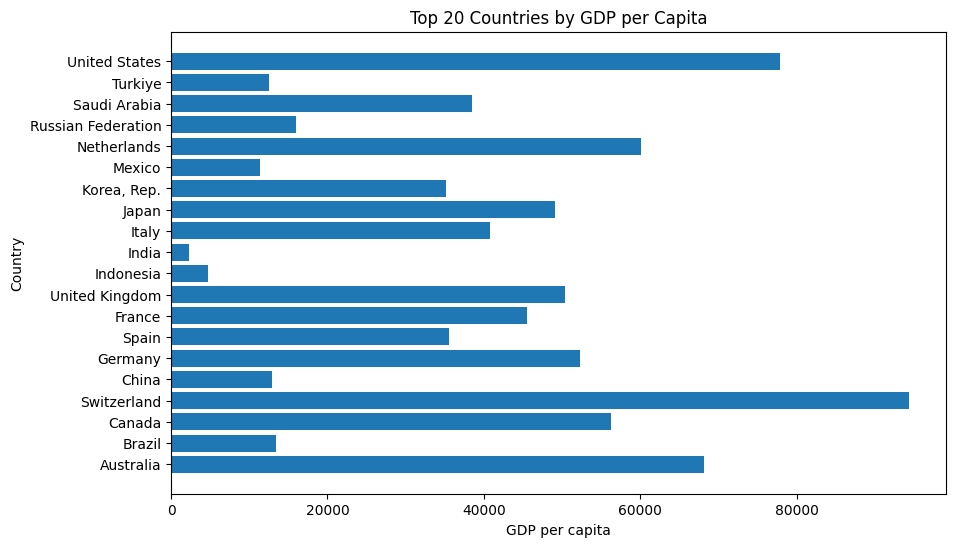

In [9]:
# Load the dataset
df = pd.read_csv('top20_gdp_indicators_1980_2022.csv')

plt.figure(figsize=(10, 6))
plt.xlabel("GDP per capita")
plt.ylabel("Country")
plt.title("Top 20 Countries by GDP per Capita")
plt.barh(df['country'], df['gdp_per_capita'])
plt.show()

# Please see screenshots attached in case Gradescope does not show the plot

Explain the graph you made above and the distribution of it. This one will be a side-by-side bar graph.

Here you want to create a heatmap of the numerical columns described in the dataset, what had the highest correlation coefficients and what attributes can we use for our analysis and ML practices for the future?

![LinePlot](plot_screenshots/lineplot.png)

Create a time-series plot of any type of attribute you want from the dataset, and describe how the distribution changed for specific countries overtime, what were some outliers and what stood out?